Loading the data

In [1]:
import pandas as pd

# Load data from Excel
train_data = pd.read_excel('/content/wysa_data.xlsx', sheet_name='Train')
test_data = pd.read_excel('/content/wysa_data.xlsx', sheet_name='Test')

In [3]:
train_data.head()

tweet_text  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...   
1  @jessedee Know about @fludapp ? Awesome iPad/i...   
2  @swonderlin Can not wait for #iPad 2 also. The...   
3  @sxsw I hope this year's festival isn't as cra...   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion

In [4]:
test_data.head()

Tweet
0  Hand-Held ���Hobo�۪: Drafthouse launches ���Ho...
1  Again? RT @mention Line at the Apple store is ...
2  Boooo! RT @mention Flipboard is developing an ...
3  Thanks to @mention for publishing the news of ...
4  ���@mention &quot;Apple has opened a pop-up st...

In [5]:
train_data.shape

(8589, 3)

In [6]:
test_data.shape

(504, 1)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8589 entries, 0 to 8588
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          8588 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  8589 non-null   object
dtypes: object(3)
memory usage: 201.4+ KB


point1- We dont have data for nearly more that 5000 tweets at what product they are tweeting about.
so we will drop the data which have no product value. for now atlaest

In [12]:
train_org_data=train_data.copy(deep = False)

In [13]:
train_org_data.shape

(8589, 3)

In [14]:
train_data.dropna(inplace=True)

In [15]:
train_data.shape

(3291, 3)

In [16]:
train_data.rename(columns={'emotion_in_tweet_is_directed_at': 'product',"is_there_an_emotion_directed_at_a_brand_or_product":"sentiment"}, inplace=True)

In [17]:
train_data.head()

tweet_text             product  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

          sentiment  
0  Negative emotion  
1  Positive emotion  
2  Positive emotion  
3  Negative emotion  
4  Positive emotion

In [18]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3291 entries, 0 to 8584
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_text  3291 non-null   object
 1   product     3291 non-null   object
 2   sentiment   3291 non-null   object
dtypes: object(3)
memory usage: 102.8+ KB


Let's now do the EDA for each column of train_data
1. for sentiments
2. for products

In [19]:
temp = train_data.groupby('sentiment').count()['tweet_text'].reset_index().sort_values(by='tweet_text',ascending=False)
temp.style.background_gradient(cmap='Purples')

point2:-
positive tweets are more in the dataset so data is kind of imbalace..
* probable action1:- We  may need to do the data augmentation

In [20]:
from plotly import graph_objs as go
fig = go.Figure(go.Funnelarea(
    text =temp.sentiment,
    values = temp.tweet_text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='sentiment', ylabel='count'>

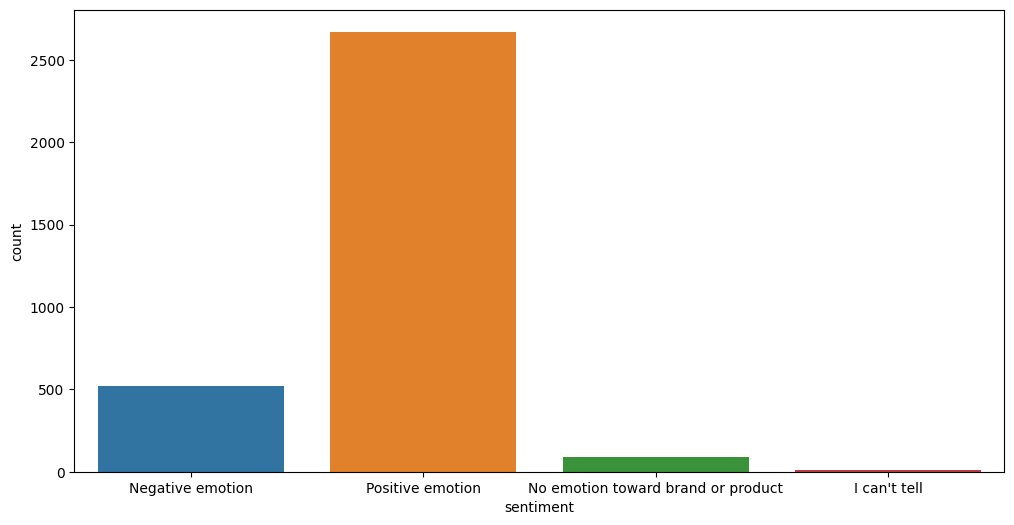

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=train_data)

### What do we currently Know About our Data:
* we know that there are nearly four type of opinions tweeted about any product that's positive, negative, no_emotion, and 'i can't say" last one has been tweeted by many few so we can ignore that type of example
* there were many null values in Product column so we dropped that example but we are keeping in mind that they still were a lot of data nearly 5000 examples.

{#### dropping those example could  means two thing
1.   as we are considering that we are mainly fopcused on the opinions of people or reviews of peoplr towards any product and not their general opinion.
2.   the dropped data my contain opinion of people about something common that still need to be explored }



* we know that data is imbalanced as positive examples are naerly 81% and if we build any model taking this imbalance data that may be biased towards one class.
* we surly need augmentation of our data or look back to dropped example but need to fill some product value as those examples were having null value in product column



## let's look the distribuition of sentiment without dropping any example

In [22]:
train_org_data.rename(columns={'emotion_in_tweet_is_directed_at': 'product',"is_there_an_emotion_directed_at_a_brand_or_product":"sentiment"}, inplace=True)

In [24]:
temp1 = train_org_data.groupby('sentiment').count()['tweet_text'].reset_index().sort_values(by='tweet_text',ascending=False)
temp1.style.background_gradient(cmap='Purples')

<Axes: xlabel='sentiment', ylabel='count'>

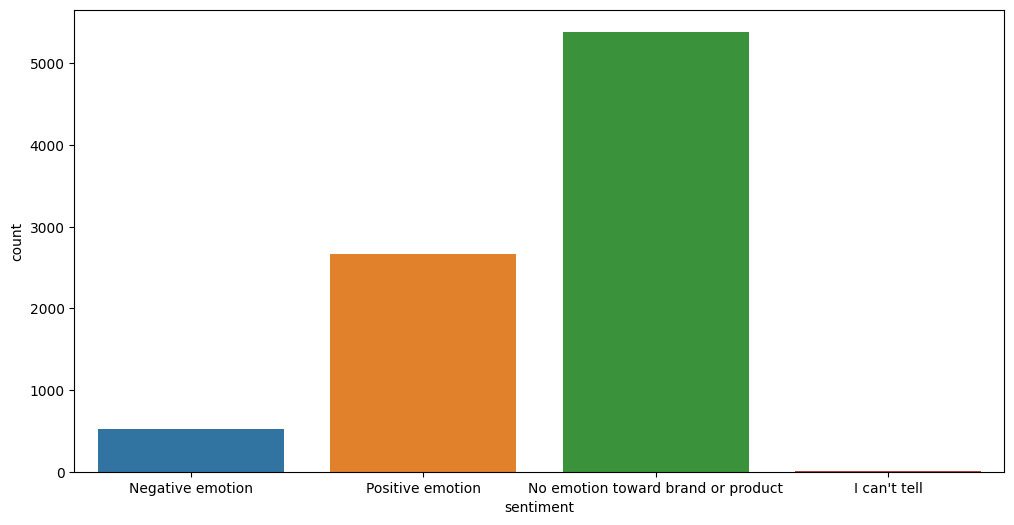

In [30]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=train_org_data)

In [25]:
from plotly import graph_objs as go
fig = go.Figure(go.Funnelarea(
    text =temp1.sentiment,
    values = temp1.tweet_text,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
fig.show()

# point3:-
* as we can see the dropped eaxmples were bascally neutral emotions or any other type of tweets which is not related to any brand or prouct, So we had no loss dropping them..


In [27]:
train_data.head()

tweet_text             product  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

          sentiment  
0  Negative emotion  
1  Positive emotion  
2  Positive emotion  
3  Negative emotion  
4  Positive emotion

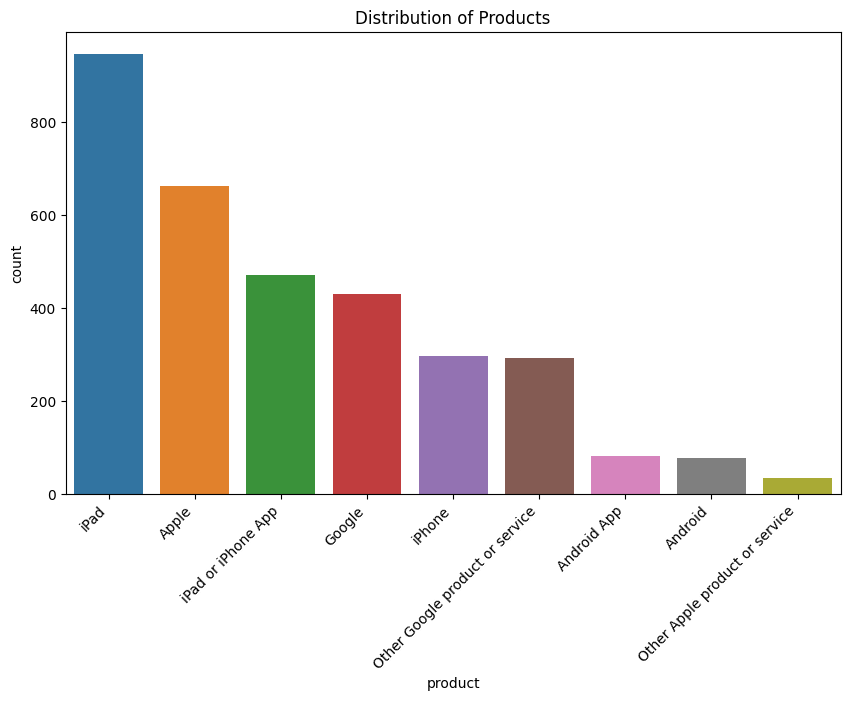

In [34]:
# Visualizing the distribution of products
plt.figure(figsize=(10, 6))
sns.countplot(x='product', data=train_data, order=train_data['product'].value_counts().index)
plt.title('Distribution of Products')
plt.xticks(rotation=45, ha='right')
plt.show()

In [35]:
train_data['product'].value_counts()

iPad                               946
Apple                              661
iPad or iPhone App                 470
Google                             430
iPhone                             297
Other Google product or service    293
Android App                         81
Android                             78
Other Apple product or service      35
Name: product, dtype: int64

In [36]:
#most of the people have opinions about the Apple and Google product

Let's see what type sentiment is associtaed with each type of product and their proportion by visalization

In [37]:
#We use groupby to count the occurrences of each sentiment for each product.
#We calculate the percentage of each sentiment for each product.
#We use seaborn's bar plot to visualize the stacked bar graph,
#where each bar represents a product, and the segments within the bar represent the percentage of different sentiments.

In [39]:
# Count the occurrences of each sentiment for each product
sentiment_counts = train_data.groupby(['product', 'sentiment']).size().unstack(fill_value=0)

In [40]:
# Calculate the percentage of each sentiment for each product
sentiment_percentage = sentiment_counts.div(sentiment_counts.sum(axis=1), axis=0) * 100

<Figure size 1200x800 with 0 Axes>

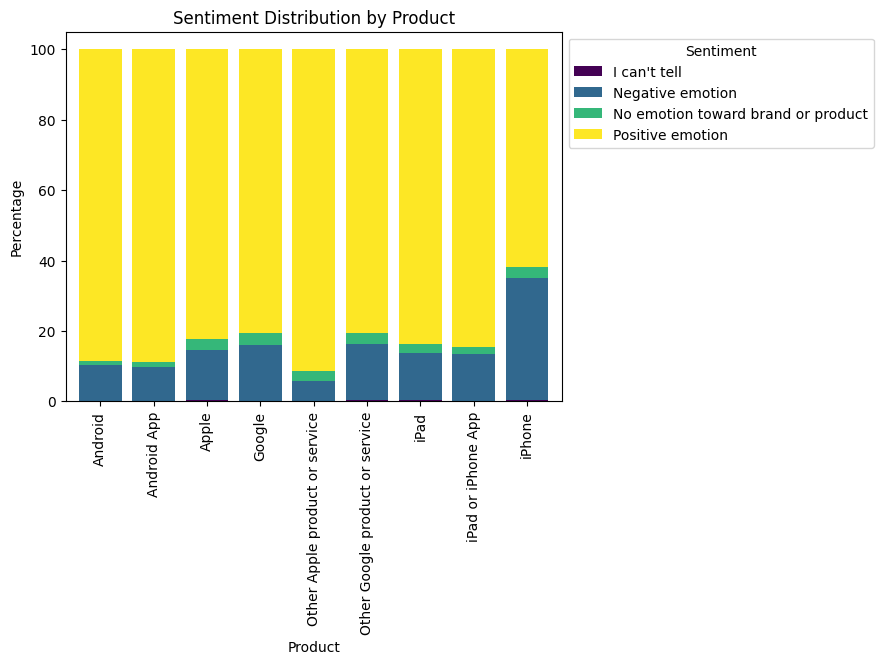

In [41]:
plt.figure(figsize=(12, 8))
sentiment_percentage.plot(kind='bar', stacked=True, colormap='viridis', width=0.8)

plt.title('Sentiment Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Percentage')
plt.legend(title='Sentiment', bbox_to_anchor=(1, 1))

plt.show()

# Observation:-
*  As we observe we can say that people have more negative tweets about iPhone.


# Let's do some more EDA for tweet text and what they are sying about  different product..

In [42]:
from wordcloud import WordCloud

In [43]:
df = train_data[['tweet_text', 'product', 'sentiment']]

df['word_count'] = df['tweet_text'].apply(lambda x: len(str(x).split()))

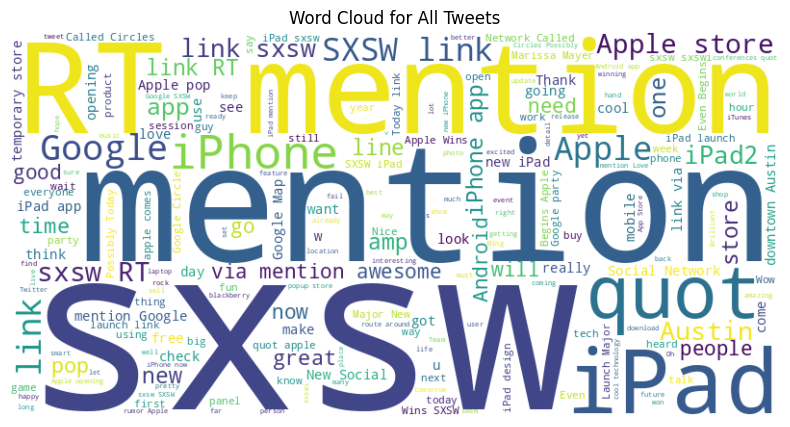

In [44]:
# Show a word cloud for all tweets
all_tweets_text = ' '.join(df['tweet_text'])
wordcloud_all_tweets = WordCloud(width=800, height=400, background_color='white').generate(all_tweets_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_all_tweets, interpolation='bilinear')
plt.title('Word Cloud for All Tweets')
plt.axis('off')
plt.show()

#As we can see more mention's about iPhones and iPads are there compare to other products

### Let's see what people are saying about different produts in their tweet which word they are using

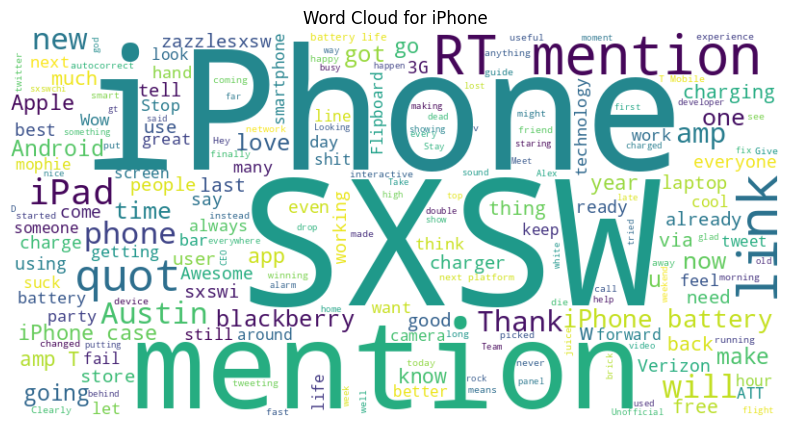

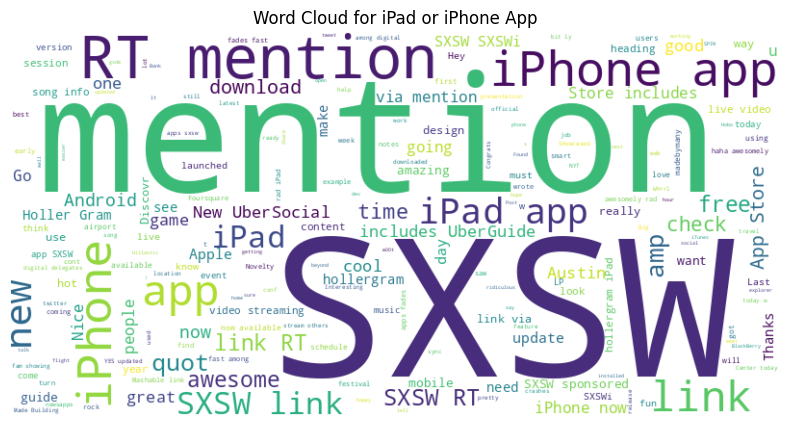

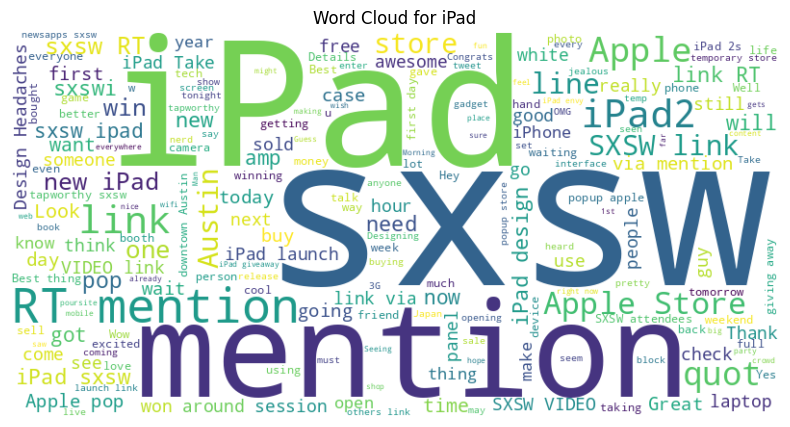

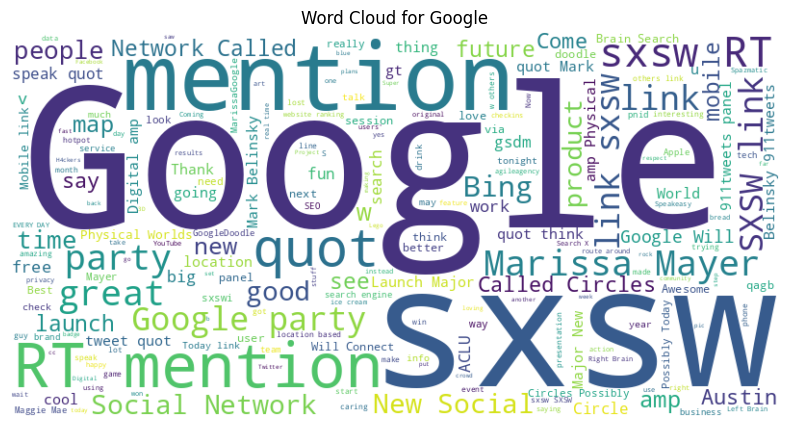

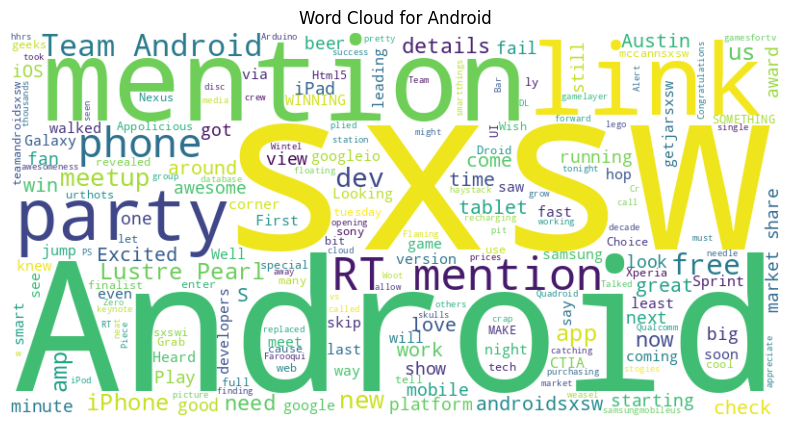

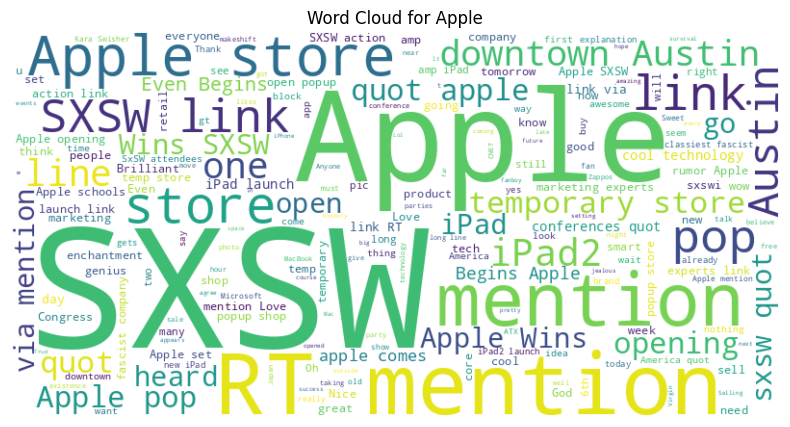

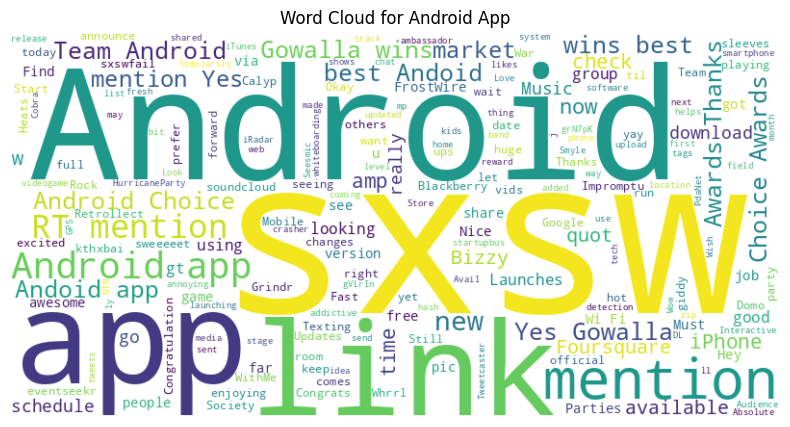

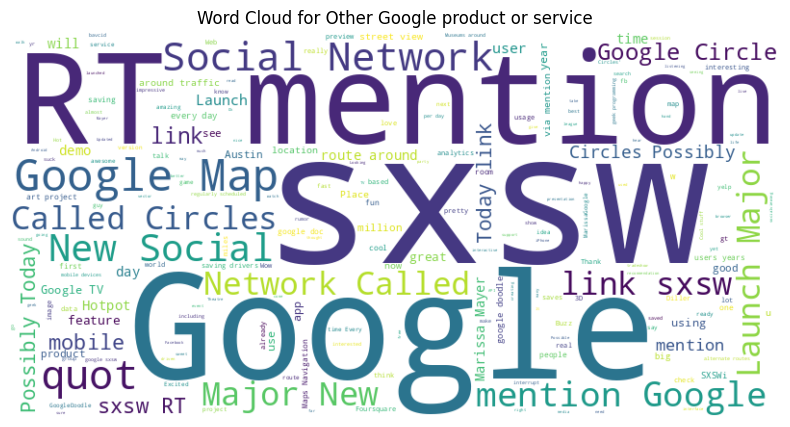

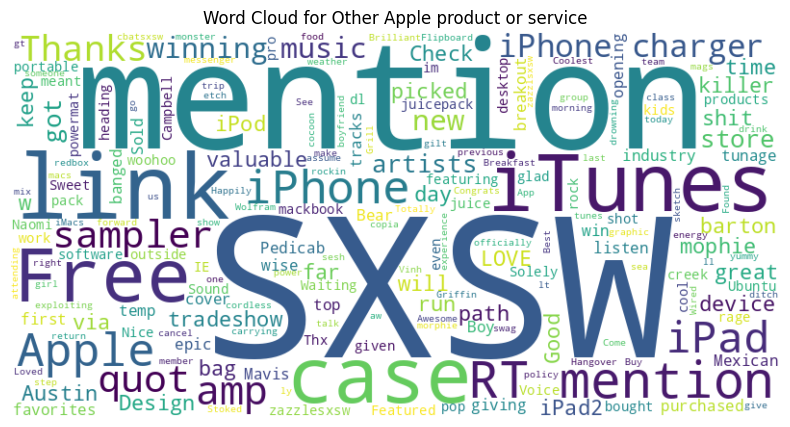

In [45]:
# Creating individual word clouds for each product
unique_products = df['product'].unique()

for product in unique_products:
    product_text = ' '.join(df[df['product'] == product]['tweet_text'])
    wordcloud_product = WordCloud(width=800, height=400, background_color='white').generate(product_text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud_product, interpolation='bilinear')
    plt.title(f'Word Cloud for {product}')
    plt.axis('off')
    plt.show()

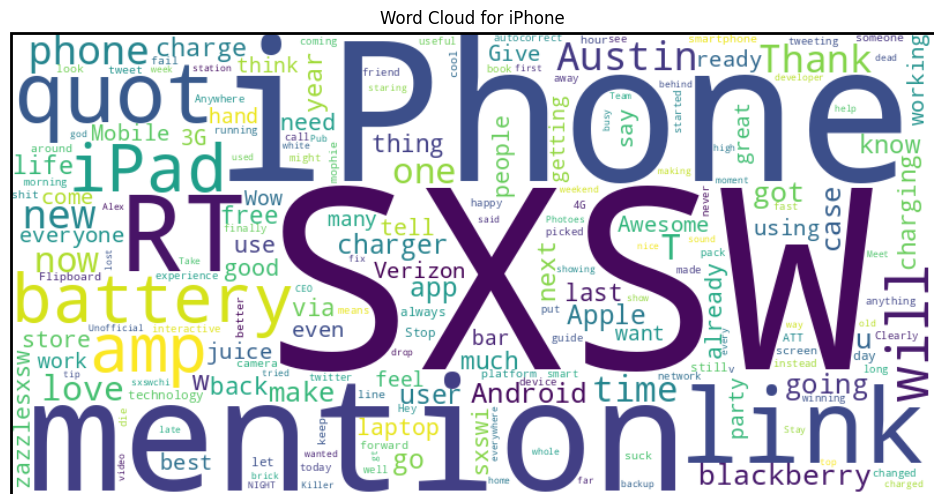

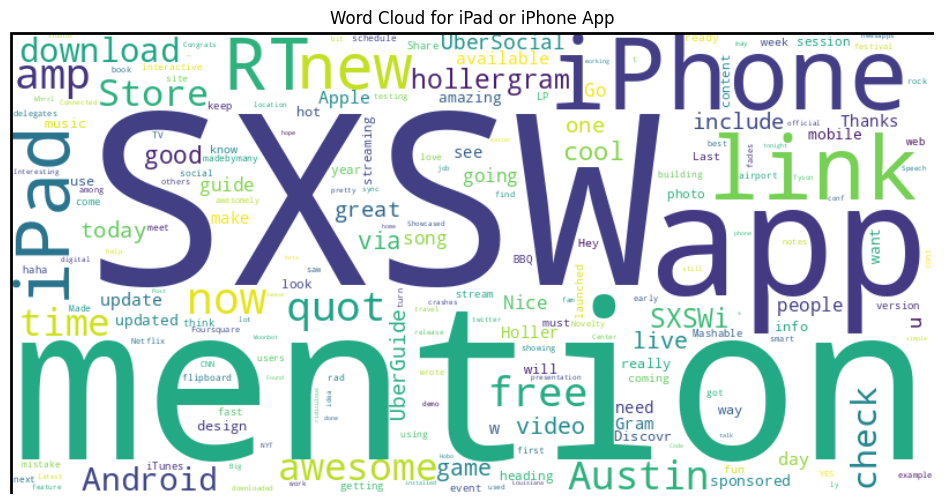

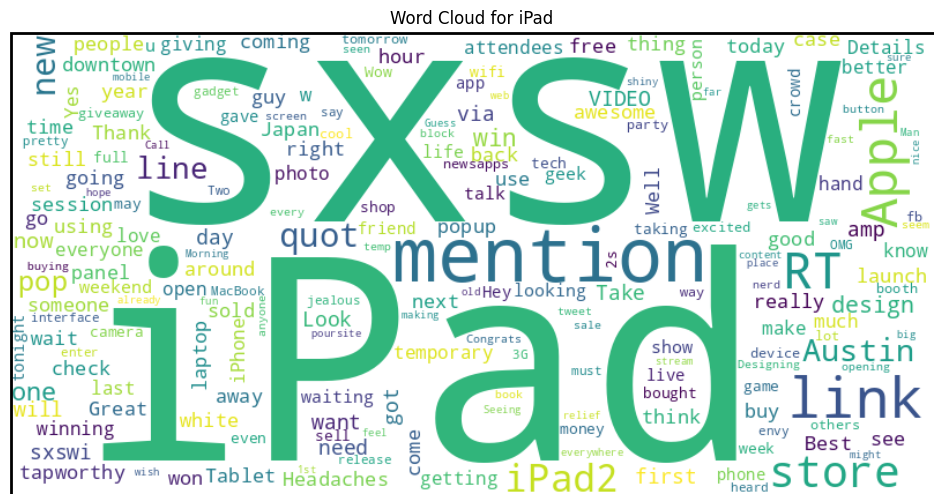

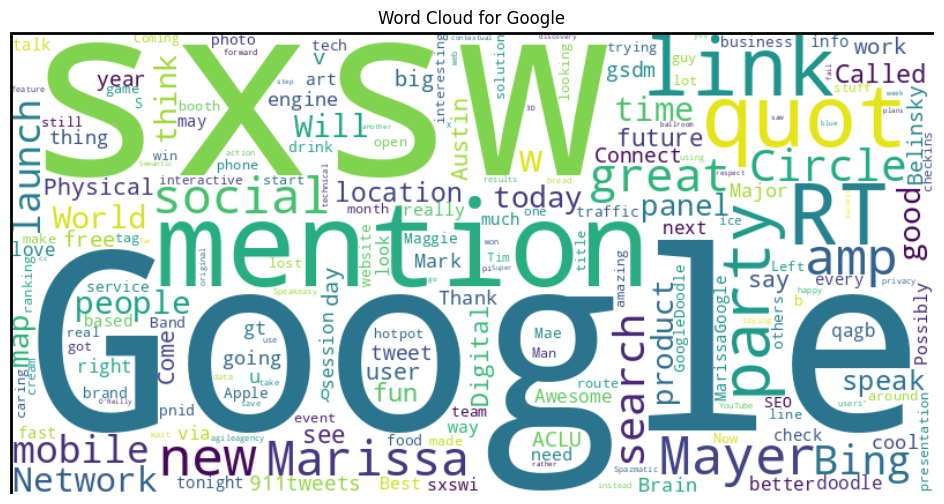

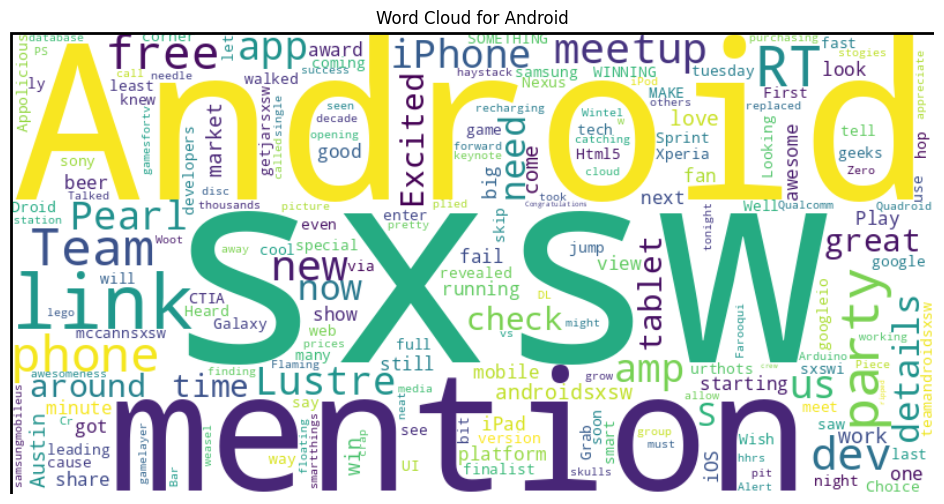

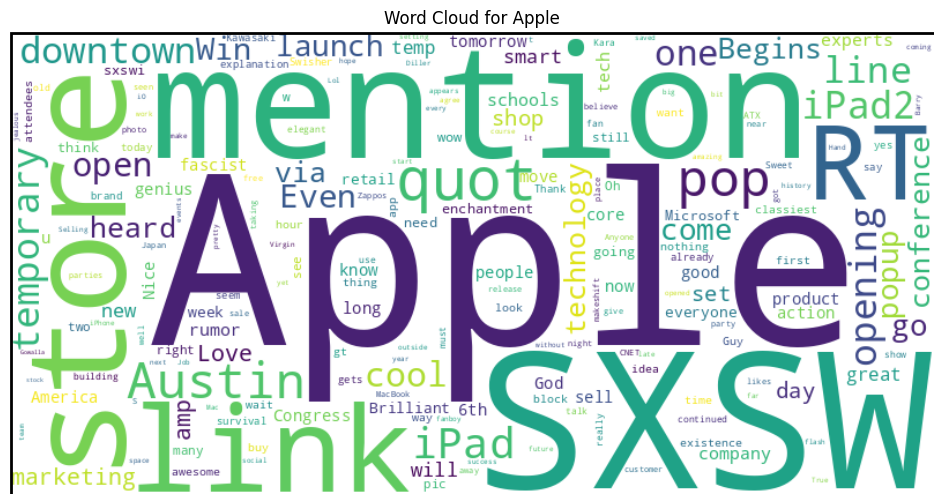

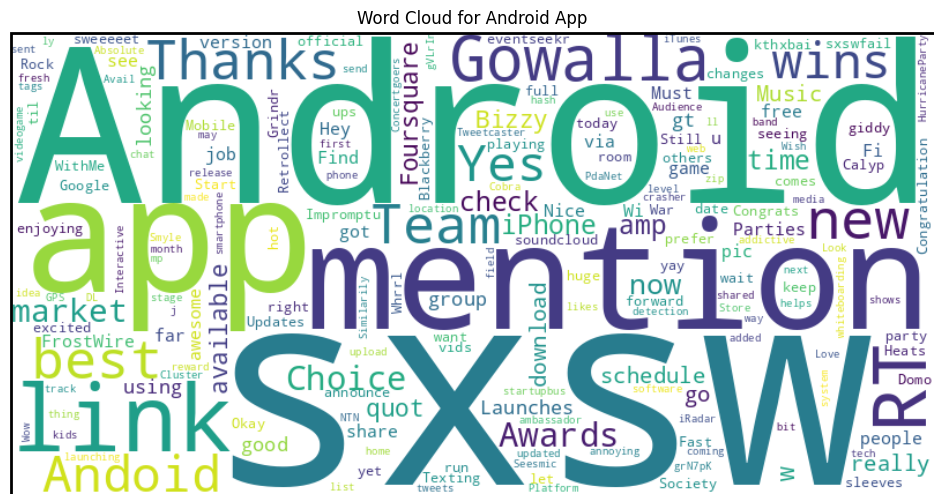

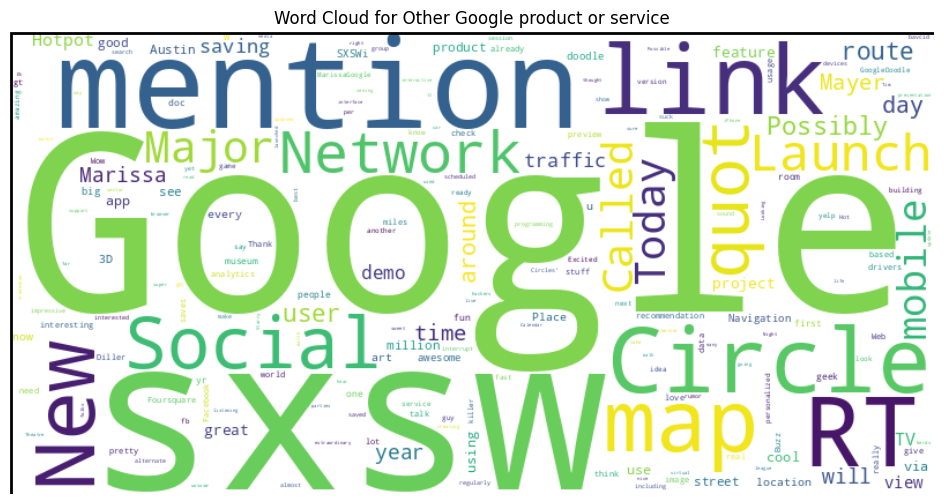

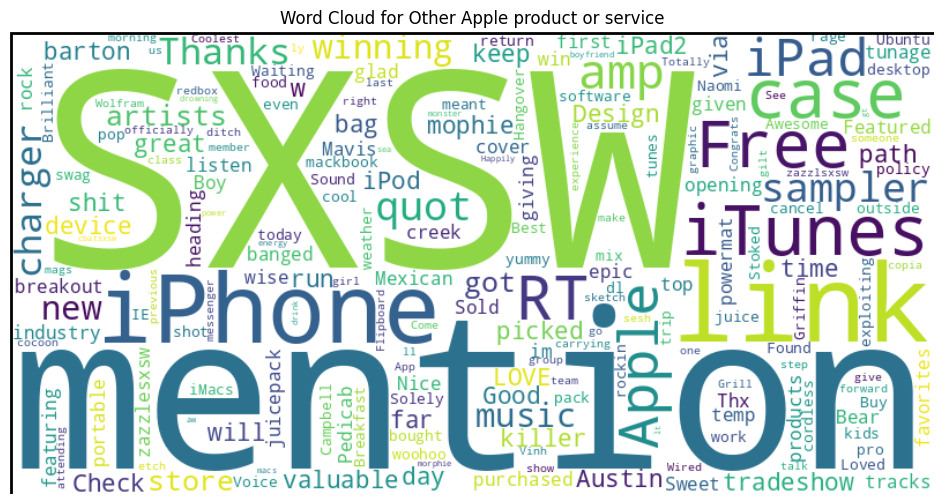

In [47]:
wordcloud_params = {
    'width': 800,
    'height': 400,
    'background_color': 'white',
    'collocations': False,
}


unique_products = df['product'].unique()

for product in unique_products:
    product_text = ' '.join(df[df['product'] == product]['tweet_text'])
    wordcloud_product = WordCloud(**wordcloud_params).generate(product_text)

    # Creating a rectangle around the word cloud
    plt.figure(figsize=(12, 6))
    plt.gca().add_patch(plt.Rectangle((0, 0), 800, 400, linewidth=2, edgecolor='black', facecolor='none'))
    plt.imshow(wordcloud_product, interpolation='bilinear')
    plt.title(f'Word Cloud for {product}')
    plt.axis('off')
    plt.show()

### Observation2:- People are talking about the battery of iPhone in their tweet.

In [48]:
train_data.head()

tweet_text             product  \
0  .@wesley83 I have a 3G iPhone. After 3 hrs twe...              iPhone   
1  @jessedee Know about @fludapp ? Awesome iPad/i...  iPad or iPhone App   
2  @swonderlin Can not wait for #iPad 2 also. The...                iPad   
3  @sxsw I hope this year's festival isn't as cra...  iPad or iPhone App   
4  @sxtxstate great stuff on Fri #SXSW: Marissa M...              Google   

          sentiment  
0  Negative emotion  
1  Positive emotion  
2  Positive emotion  
3  Negative emotion  
4  Positive emotion

# Calculating the most common words in tweets in general.
# Displaying the most common words in a DataFrame and as a bar graph.
# Createing individual DataFrames and bar graphs for each product.

In [49]:
from collections import Counter

In [50]:
df = train_data[['tweet_text', 'product', 'sentiment']]
all_tweets_text = ' '.join(df['tweet_text'])

In [51]:
all_words = all_tweets_text.split()

In [52]:
word_counts = Counter(all_words)

In [58]:
top_words_df = pd.DataFrame(word_counts.most_common(40), columns=['Common_words', 'count'])

In [59]:
top_words_df.head()

Common_words  count
0     @mention   2137
1          the   1612
2        #sxsw   1464
3           to   1294
4        #SXSW   1268

In [60]:
print("Most common words in tweets in general:")
print(top_words_df)

Most common words in tweets in general:
   Common_words  count
0      @mention   2137
1           the   1612
2         #sxsw   1464
3            to   1294
4         #SXSW   1268
5        {link}   1197
6            at    996
7            RT    955
8           for    927
9             a    845
10         iPad    800
11           is    715
12           of    714
13           in    652
14        Apple    604
15          and    582
16            I    504
17       Google    476
18           on    471
19            2    382
20       iPhone    382
21           an    375
22        store    353
23           my    332
24            -    320
25         with    312
26           up    297
27          app    279
28          new    248
29          you    245
30           it    232
31           be    228
32       Austin    202
33         have    188
34         that    185
35         this    179
36        &amp;    173
37          out    170
38         from    168
39           by    166


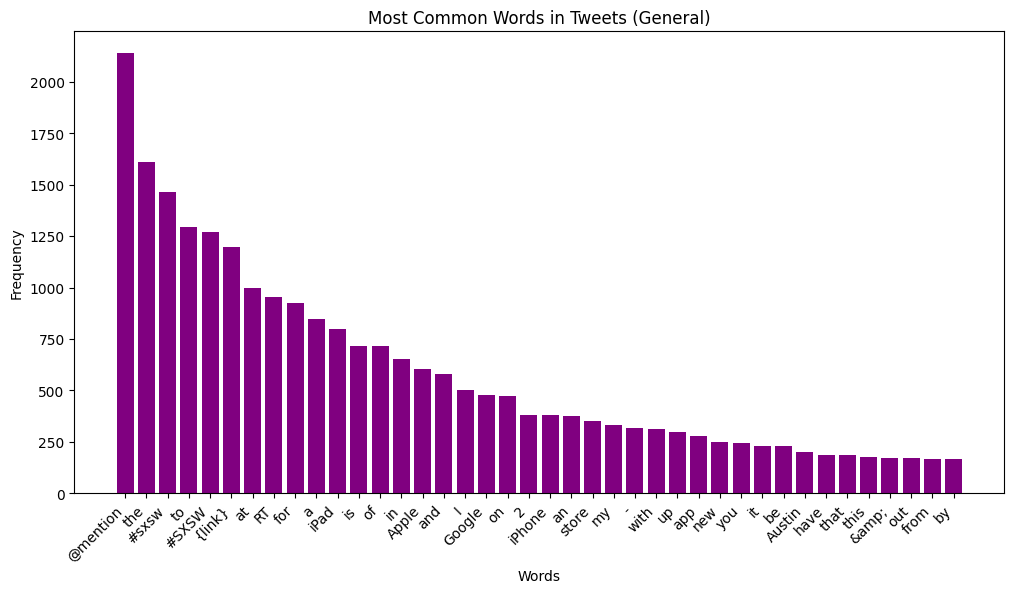

In [63]:
plt.figure(figsize=(12, 6))
plt.bar(top_words_df['Common_words'], top_words_df['count'], color='purple')
plt.title('Most Common Words in Tweets (General)')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


Most common words for iPhone:
   Common_words  count
0      @mention    181
1        iPhone    174
2            to    128
3           the    127
4         #sxsw    116
5         #SXSW    115
6            at     91
7            my     89
8             a     77
9             I     76
10          for     67
11           RT     66
12          and     66
13           is     65
14       {link}     62
15           on     57
16           in     50
17           of     48
18         your     45
19           an     41


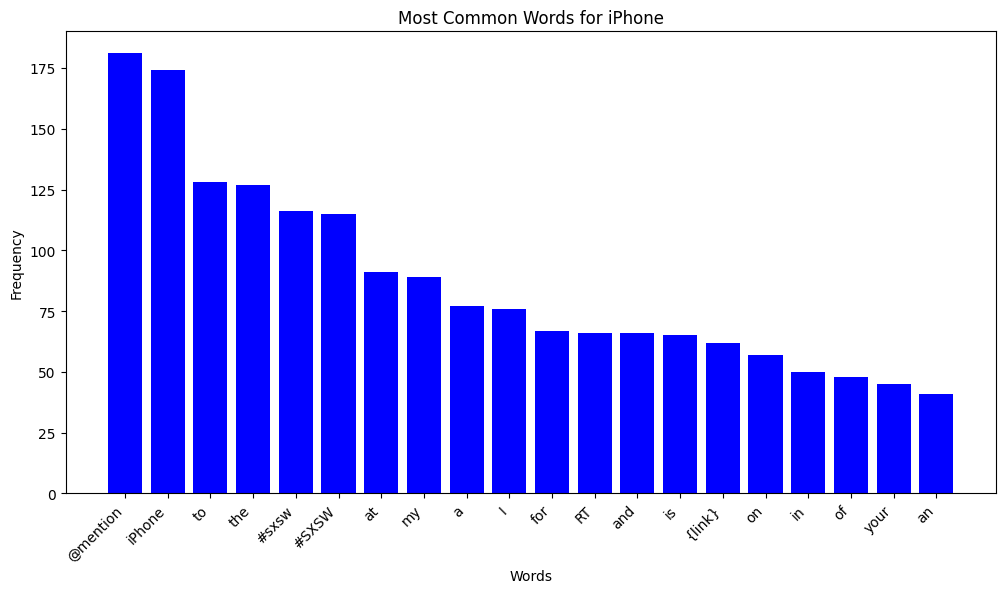


Most common words for iPad or iPhone App:
   Common_words  count
0      @mention    388
1           for    241
2        {link}    230
3           the    225
4         #SXSW    219
5           app    218
6        iPhone    186
7            to    186
8         #sxsw    170
9            RT    155
10         iPad    120
11           at    108
12           is    106
13           on     97
14           of     95
15            a     80
16          and     76
17           in     73
18          new     67
19          you     56


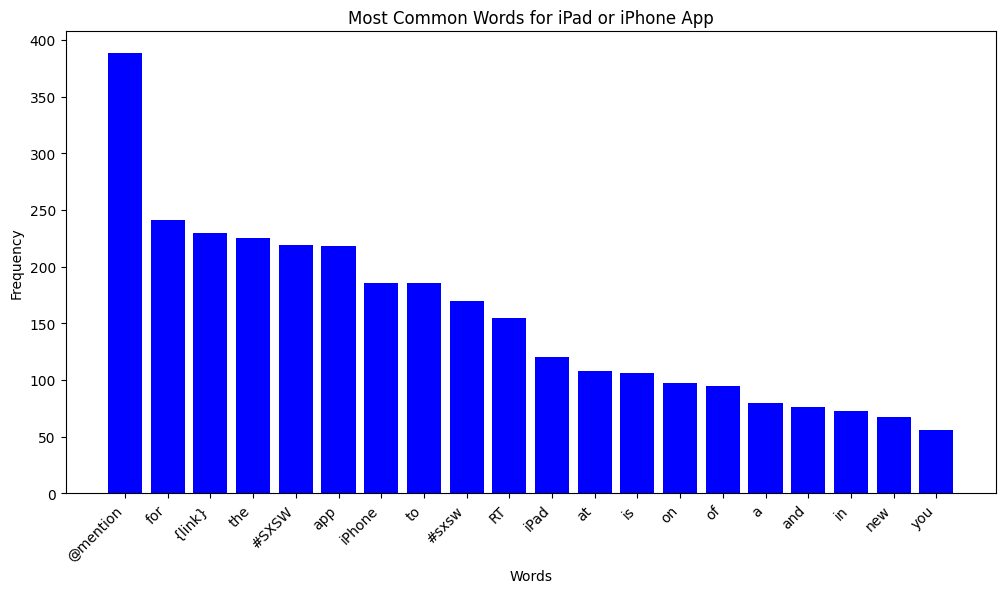


Most common words for iPad:
   Common_words  count
0          iPad    601
1           the    559
2      @mention    542
3         #sxsw    427
4            to    398
5         #SXSW    376
6            at    343
7        {link}    298
8             2    284
9             a    278
10          for    251
11            I    244
12           an    238
13           RT    223
14           in    199
15           of    197
16           is    178
17          and    171
18        Apple    134
19           on    134


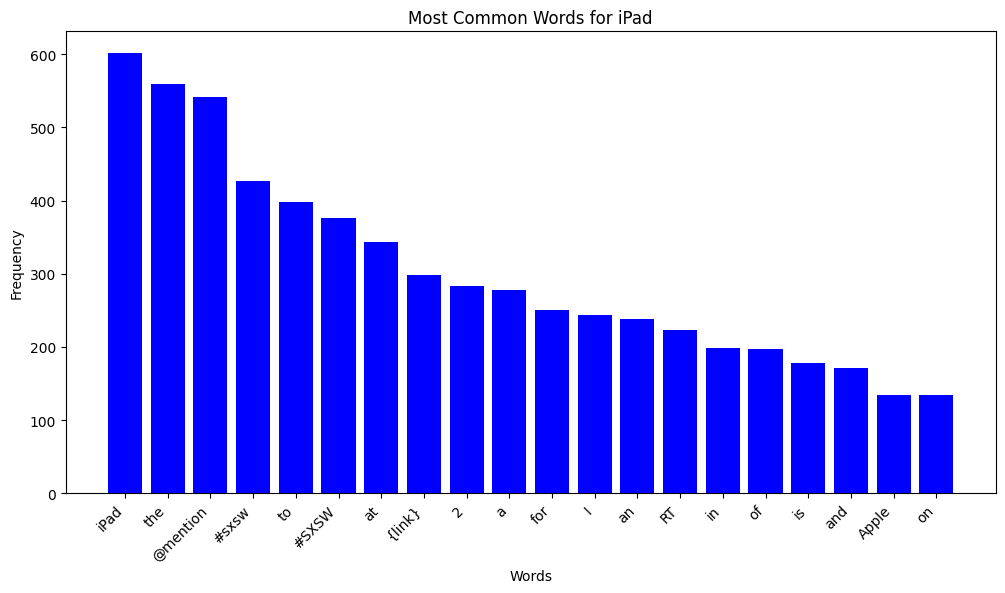


Most common words for Google:
   Common_words  count
0      @mention    282
1        Google    244
2         #sxsw    237
3           the    198
4            to    154
5            RT    139
6            at    132
7         #SXSW    130
8        {link}    125
9            is    107
10          and     98
11            a     85
12           of     78
13          for     63
14            -     61
15       google     51
16           on     48
17           in     47
18          you     44
19      Marissa     38


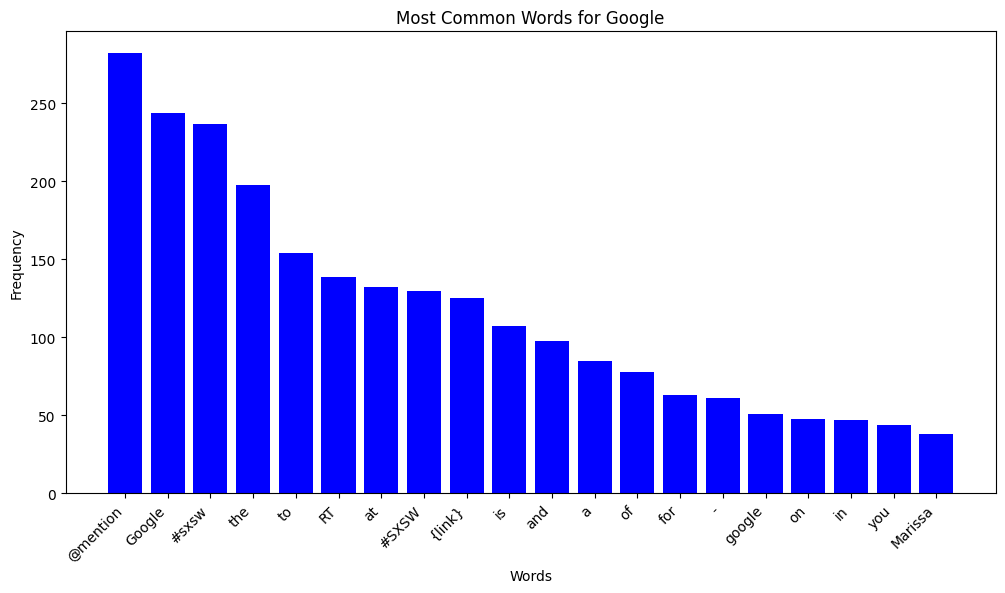


Most common words for Android:
   Common_words  count
0      @mention     50
1       Android     49
2         #sxsw     43
3           the     38
4            at     35
5             a     28
6            to     28
7        {link}     27
8           for     25
9         #SXSW     23
10          and     23
11           is     19
12            I     18
13           of     16
14     #android     14
15           RT     13
16         with     11
17           on     10
18         just      9
19           my      9


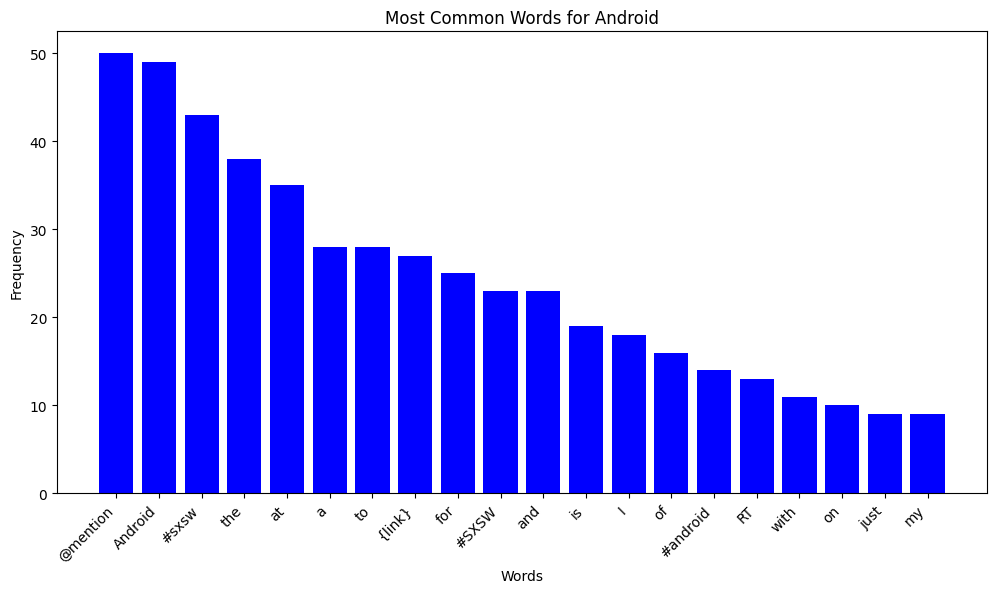


Most common words for Apple:
   Common_words  count
0         Apple    456
1      @mention    429
2           the    323
3        {link}    309
4         #SXSW    277
5         #sxsw    243
6            to    236
7         store    229
8            RT    225
9            in    216
10            a    215
11           at    197
12          for    191
13           of    187
14           is    164
15           up    142
16       Austin     98
17          and     86
18       pop-up     81
19           on     79


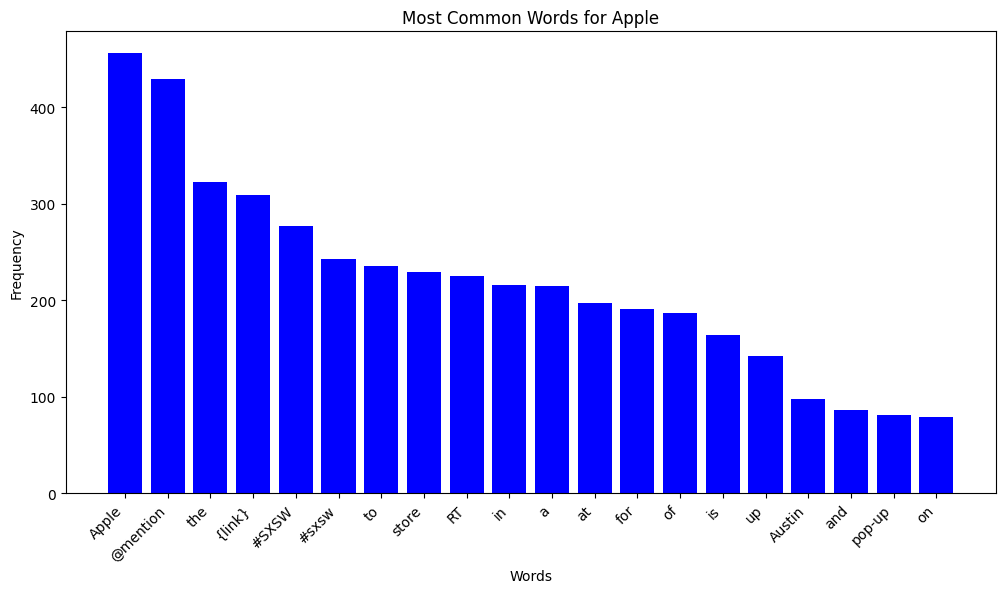


Most common words for Android App:
   Common_words  count
0      @mention     61
1       Android     47
2           the     45
3         #sxsw     43
4           app     42
5        {link}     33
6            at     32
7           for     32
8         #SXSW     26
9            to     24
10           RT     21
11           in     18
12           is     17
13          and     15
14      Gowalla     14
15         best     13
16           on     13
17            a     12
18       Thanks     12
19         Yes!     11


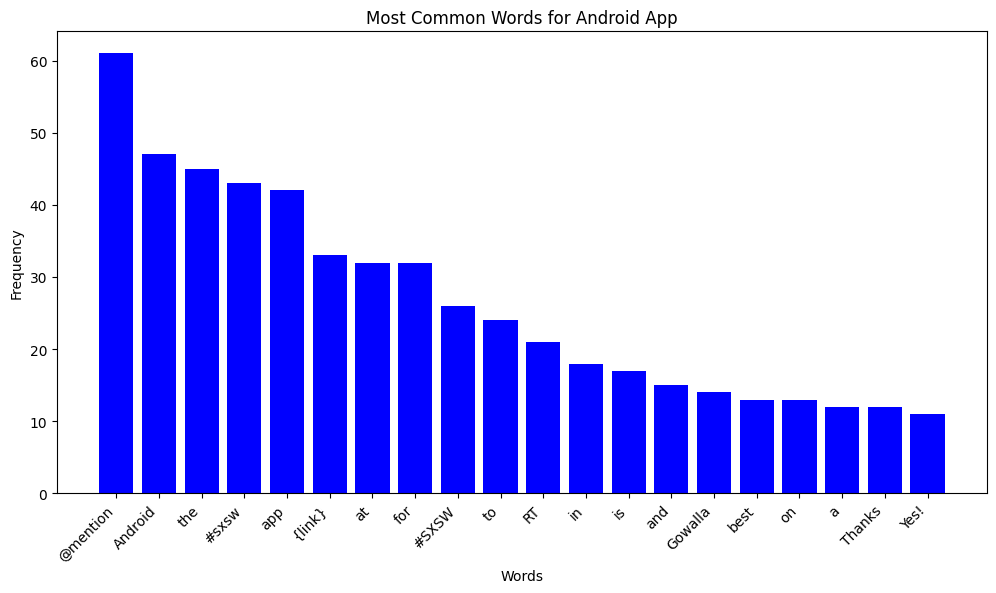


Most common words for Other Google product or service:
   Common_words  count
0        Google    226
1      @mention    176
2         #sxsw    170
3            to    133
4            RT    103
5        {link}     99
6         #SXSW     86
7            of     81
8           the     79
9             a     58
10           is     54
11           at     53
12       Social     46
13          New     44
14          for     43
15          and     43
16      Network     42
17     Circles,     40
18        Major     39
19       Launch     38


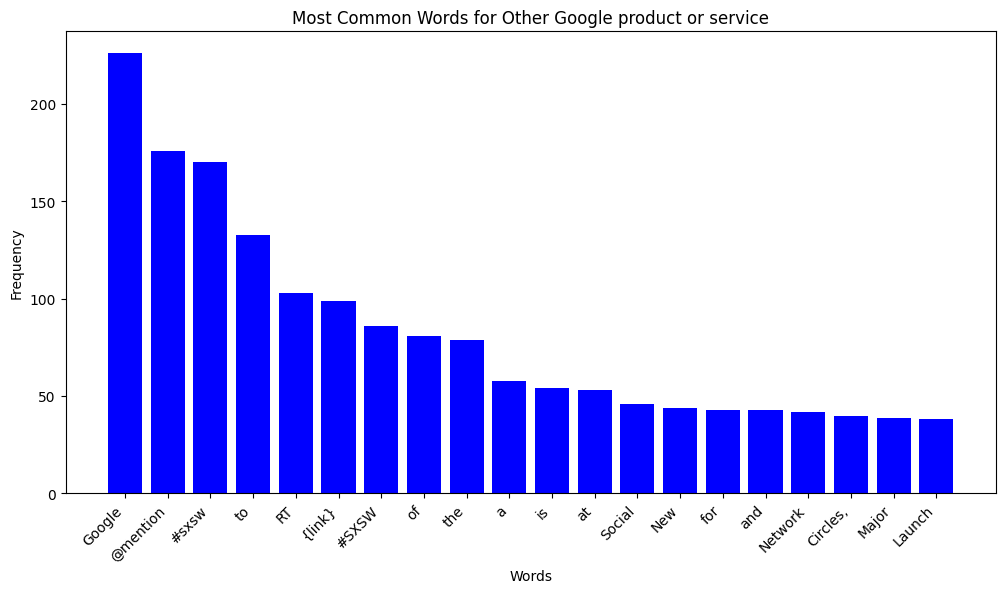


Most common words for Other Apple product or service:
   Common_words  count
0      @mention     28
1           the     18
2         #SXSW     16
3         #sxsw     15
4        {link}     14
5           for     14
6             a     12
7            RT     10
8            my      9
9            on      8
10       iPhone      7
11           to      7
12        &amp;      6
13         iPad      6
14       Thanks      5
15           is      5
16       iTunes      5
17            I      5
18           of      5
19           at      5


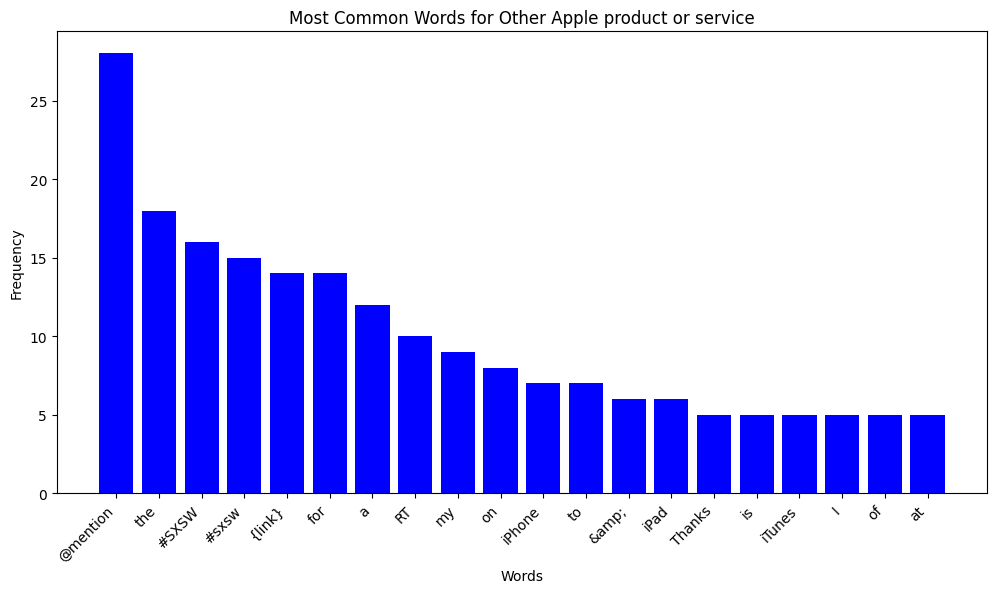

In [64]:

unique_products = df['product'].unique()

for product in unique_products:
    # Concatenating tweet texts for the current product
    product_tweets_text = ' '.join(df[df['product'] == product]['tweet_text'])

    # Tokenizing the text for the current product
    product_words = product_tweets_text.split()

    # Counting the occurrences of each word for the current product
    product_word_counts = Counter(product_words)

    top_words_product_df = pd.DataFrame(product_word_counts.most_common(20), columns=['Common_words', 'count'])

    print(f"\nMost common words for {product}:")
    print(top_words_product_df)


    plt.figure(figsize=(12, 6))
    plt.bar(top_words_product_df['Common_words'], top_words_product_df['count'], color='blue')
    plt.title(f'Most Common Words for {product}')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()

## SXWS is mostly used for iPhone and iPad

# Some ways to improve the dataset quality

* The train_data dataset is a good starting point for sentiment analysis of tweets about tech products. However, there are a few ways to improve it further.

* First, the dataset could be expanded to include more tweets. This could be done by crawling Twitter for more data, or by collecting data from other sources such as social media platforms or news websites.

* Second, the dataset could be cleaned to remove duplicate tweets and tweets that are not relevant to tech products. This could be done using a combination of manual and automated techniques.


* By following these steps, the train_data dataset could be improved to make it a more valuable resource for sentiment analysis of tweets about tech products.

# Let's train a model with augmentation and using transfer learning i mean we will use pretraind weight's instead of starting the traing from very initial  random weight values.